In [22]:
# Graphs

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline  

In [24]:
#%lsmagic

# 2.1
figure_path = "/home/simon/eth/asl-fall17-project/report/Data/21/"
data_path = "/home/simon/eth/asl-fall17-project/report/Data/"
get_tp = pd.read_csv(data_path+"2.1/2_1_gets_throughput.csv")
get_rt = pd.read_csv(data_path+"2.1/2_1_gets_response_time.csv")

set_tp = pd.read_csv(data_path+"2.1/2_1_sets_throughput.csv")
set_rt = pd.read_csv(data_path+"2.1/2_1_sets_response_time.csv")

# Drop VC column
get_rt = get_rt.drop(get_rt.columns[0],axis=1)
set_rt = set_rt.drop(set_rt.columns[0],axis=1)

# #Clients = #ClientVMs * MemtierPerVM * CT * VC
VC = get_tp.iloc[:,0]
N_clients = 3*1*2*VC
X_axis = N_clients


# GETS
gets_tp_rep1 = get_tp.iloc[:,1]+get_tp.iloc[:,4]+get_tp.iloc[:,7]
gets_tp_rep2 = get_tp.iloc[:,2]+get_tp.iloc[:,5]+get_tp.iloc[:,8]
gets_tp_rep3 = get_tp.iloc[:,3]+get_tp.iloc[:,6]+get_tp.iloc[:,9]
gets_tp_reps = pd.concat([gets_tp_rep1, gets_tp_rep2, gets_tp_rep3],axis=1)
gets_tp_mean = gets_tp_reps.mean(axis=1)
gets_tp_std  = gets_tp_reps.std(axis=1)

#gets_rt_mean = get_rt.mean(axis=1)
#gets_rt_std = get_rt.std(axis=1)
gets_rt_mean = get_rt.iloc[:,9]
gets_rt_std = get_rt.iloc[:,10]


# SETS
sets_tp_rep1 = set_tp.iloc[:,1]+set_tp.iloc[:,4]+set_tp.iloc[:,7]
sets_tp_rep2 = set_tp.iloc[:,2]+set_tp.iloc[:,5]+set_tp.iloc[:,8]
sets_tp_rep3 = set_tp.iloc[:,3]+set_tp.iloc[:,6]+set_tp.iloc[:,9]
sets_tp_reps = pd.concat([sets_tp_rep1, sets_tp_rep2, sets_tp_rep3],axis=1)
sets_tp_mean = sets_tp_reps.mean(axis=1)
sets_tp_std  = sets_tp_reps.std(axis=1)

# sets_rt_mean = set_rt.mean(axis=1)
# sets_rt_std = set_rt.std(axis=1)
sets_rt_mean = set_rt.iloc[:,9]
sets_rt_std = set_rt.iloc[:,10]

# Interactive law Throughput
# TPUT = 1/RT * #Clients
gets_il_tp = 1000/gets_rt_mean*N_clients
sets_il_tp = 1000/sets_rt_mean*N_clients

print(np.max(gets_tp_mean))
print(np.max(sets_tp_mean))

3650.64666667
7616.44666667


  agg_filter: unknown
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: [True | False] 
  clip_box: a :class:`matplotlib.transforms.Bbox` instance 
  clip_on: [True | False] 
  clip_path: [ (:class:`~matplotlib.path.Path`, :class:`~matplotlib.transforms.Transform`) | :class:`~matplotlib.patches.Patch` | None ] 
  contains: a callable function 
  figure: a :class:`matplotlib.figure.Figure` instance 
  gid: an id string 
  label: str 
  label1: str 
  label2: str 
  pad: float 
  path_effects: unknown
  picker: [None|float|boolean|callable] 
  rasterized: [True | False | None] 
  sketch_params: unknown
  snap: unknown
  transform: :class:`~matplotlib.transforms.Transform` instance 
  url: a url string 
  visible: [True | False] 
  zorder: any number 
  agg_filter: unknown
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: [True | False] 
  clip_box: a :class:`matplotlib.transforms.Bbox` instance 
  clip_on: [True | False] 
  clip_path: [ (:class:`~matplotlib.

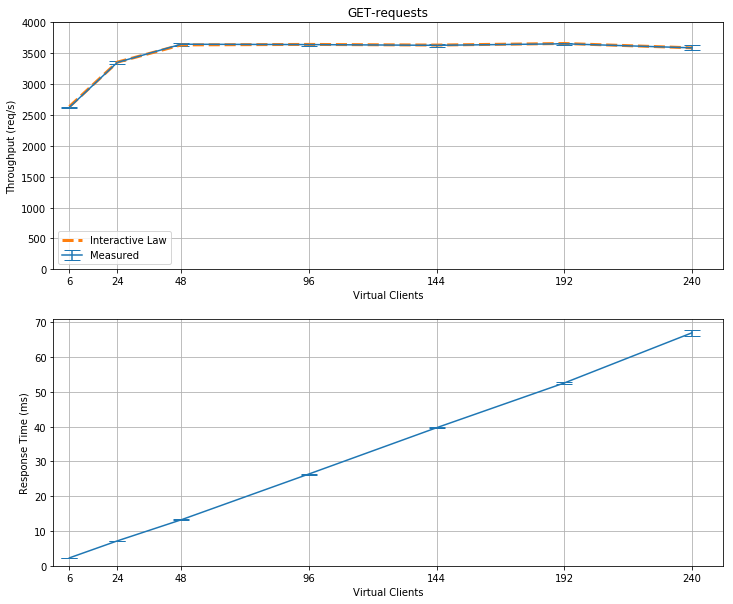

  agg_filter: unknown
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: [True | False] 
  clip_box: a :class:`matplotlib.transforms.Bbox` instance 
  clip_on: [True | False] 
  clip_path: [ (:class:`~matplotlib.path.Path`, :class:`~matplotlib.transforms.Transform`) | :class:`~matplotlib.patches.Patch` | None ] 
  contains: a callable function 
  figure: a :class:`matplotlib.figure.Figure` instance 
  gid: an id string 
  label: str 
  label1: str 
  label2: str 
  pad: float 
  path_effects: unknown
  picker: [None|float|boolean|callable] 
  rasterized: [True | False | None] 
  sketch_params: unknown
  snap: unknown
  transform: :class:`~matplotlib.transforms.Transform` instance 
  url: a url string 
  visible: [True | False] 
  zorder: any number 
  agg_filter: unknown
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: [True | False] 
  clip_box: a :class:`matplotlib.transforms.Bbox` instance 
  clip_on: [True | False] 
  clip_path: [ (:class:`~matplotlib.

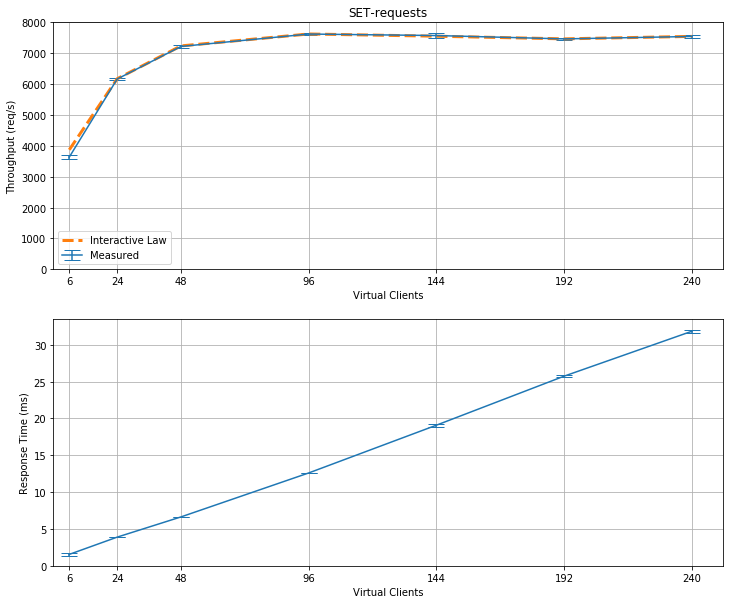

In [40]:
figure1 = plt.figure(1, figsize=(12, 10))
graph_get_tp = figure1.add_subplot(2,1,1)
graph_get_tp.errorbar(X_axis, gets_tp_mean, yerr=gets_tp_std, capsize=8)
graph_get_tp.plot(X_axis, gets_il_tp, '--', linewidth=3) 
plt.xlabel("Virtual Clients")
plt.ylabel("Throughput (req/s)")
plt.ylim(0,4000)
plt.xlim(0)
plt.grid(True)
plt.setp([plt.xticks(X_axis)])
plt.legend(["Interactive Law", "Measured"])

graph_get_rt = figure1.add_subplot(2,1,2)
graph_get_rt.errorbar(X_axis, gets_rt_mean, yerr=gets_rt_std, capsize=8)
plt.xlabel("Virtual Clients")
plt.ylabel("Response Time (ms)")
plt.ylim(0)
plt.xlim(0)
plt.grid(True)
plt.setp([plt.xticks(X_axis)])
graph_get_tp.set_title("GET-requests")
plt.show()
figure1.savefig(figure_path+"21_get_requests.png")
# Write to file
import distutils.dir_util
p = figure_path + "21_get_requests/"
distutils.dir_util.mkpath(p)
f = open(p+"processed.log", "w+")
f.write("X_axis\r\n")
f.write(str(X_axis))
f.write("\r\ngets_tp_mean\r\n")
f.write(str(gets_tp_mean))
f.write("\r\ngets_tp_std\r\n")
f.write(str(gets_tp_std))
f.write("\r\ngets_tp_IL\r\n")
f.write(str(gets_il_tp))
f.write("\r\ngets_rt_mean\r\n")
f.write(str(gets_rt_mean))
f.write("\r\ngets_tp_std\r\n")
f.write(str(gets_rt_std))
f.close()


figure2 = plt.figure(2, figsize=(12, 10))
graph_set_tp = figure2.add_subplot(2,1,1)
graph_set_tp.errorbar(X_axis, sets_tp_mean, yerr=sets_tp_std, capsize=8)
graph_set_tp.plot(X_axis, sets_il_tp, '--', linewidth=3) 
plt.xlabel("Virtual Clients")
plt.ylabel("Throughput (req/s)")
plt.ylim(0,8000)
plt.xlim(0)
plt.grid(True)
plt.setp([plt.xticks(X_axis)])
plt.legend(["Interactive Law", "Measured"])

graph_set_rt = figure2.add_subplot(2,1,2)
graph_set_rt.errorbar(X_axis, sets_rt_mean, yerr=sets_rt_std, capsize=8)
plt.xlabel("Virtual Clients")
plt.ylabel("Response Time (ms)")
plt.ylim(0)
plt.xlim(0)
plt.grid(True)
plt.setp([plt.xticks(X_axis)])
graph_set_tp.set_title("SET-requests")
plt.show()
figure2.savefig(figure_path+"21_set_requests.png")

# Write to file
import distutils.dir_util
p = figure_path + "21_set_requests/"
distutils.dir_util.mkpath(p)
f = open(p+"processed.log", "w+")
f.write("X_axis\r\n")
f.write(str(X_axis))
f.write("\r\nsets_tp_mean\r\n")
f.write(str(sets_tp_mean))
f.write("\r\nsets_tp_std\r\n")
f.write(str(sets_tp_std))
f.write("\r\nsets_tp_IL\r\n")
f.write(str(sets_il_tp))
f.write("\r\nsets_rt_mean\r\n")
f.write(str(sets_rt_mean))
f.write("\r\nsets_tp_std\r\n")
f.write(str(sets_rt_std))
f.close()

In [42]:
#2.2
data_path = "/home/simon/eth/asl-fall17-project/report/Data/"
figure_path = "/home/simon/eth/asl-fall17-project/report/Data/22/"
get_tp = pd.read_csv(data_path+"2.2/2_2_gets_throughput.csv")
get_rt = pd.read_csv(data_path+"2.2/2_2_gets_response_time.csv")

set_tp = pd.read_csv(data_path+"2.2/2_2_sets_throughput.csv")
set_rt = pd.read_csv(data_path+"2.2/2_2_sets_response_time.csv")
# Drop VC column
get_rt = get_rt.drop(get_rt.columns[0],axis=1)
set_rt = set_rt.drop(set_rt.columns[0],axis=1)

# #Clients = #ClientVMs * MemtierPerVM * CT * VC
VC = get_tp.iloc[:,0]
N_clients = 1*2*1*VC
X_axis = N_clients

gets_tp_rep1 = get_tp.iloc[:,1]+get_tp.iloc[:,4]
gets_tp_rep2 = get_tp.iloc[:,2]+get_tp.iloc[:,5]
gets_tp_rep3 = get_tp.iloc[:,3]+get_tp.iloc[:,6]
gets_tp_reps = pd.concat([gets_tp_rep1, gets_tp_rep2, gets_tp_rep3],axis=1)
gets_tp_mean = gets_tp_reps.mean(axis=1)
gets_tp_std  = gets_tp_reps.std(axis=1)


# gets_rt_mean = get_rt.mean(axis=1)
# gets_rt_std = get_rt.std(axis=1)
gets_rt_mean = get_rt.iloc[:,6]
gets_rt_std = get_rt.iloc[:,7]

sets_tp_rep1 = set_tp.iloc[:,1]+set_tp.iloc[:,4]
sets_tp_rep2 = set_tp.iloc[:,2]+set_tp.iloc[:,5]
sets_tp_rep3 = set_tp.iloc[:,3]+set_tp.iloc[:,6]
sets_tp_reps = pd.concat([sets_tp_rep1, sets_tp_rep2, sets_tp_rep3],axis=1)
sets_tp_mean = sets_tp_reps.mean(axis=1)
sets_tp_std  = sets_tp_reps.std(axis=1)

# sets_rt_mean = set_rt.mean(axis=1)
# sets_rt_std = set_rt.std(axis=1)
sets_rt_mean = set_rt.iloc[:,6]
sets_rt_std = set_rt.iloc[:,7]

# Interactive law Throughput
# TPUT = 1/RT * #Clients
gets_il_tp = 1000/gets_rt_mean*N_clients
sets_il_tp = 1000/sets_rt_mean*N_clients

print(np.max(gets_tp_mean))
print(np.max(sets_tp_mean))


6908.81333333
13286.0


  agg_filter: unknown
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: [True | False] 
  clip_box: a :class:`matplotlib.transforms.Bbox` instance 
  clip_on: [True | False] 
  clip_path: [ (:class:`~matplotlib.path.Path`, :class:`~matplotlib.transforms.Transform`) | :class:`~matplotlib.patches.Patch` | None ] 
  contains: a callable function 
  figure: a :class:`matplotlib.figure.Figure` instance 
  gid: an id string 
  label: str 
  label1: str 
  label2: str 
  pad: float 
  path_effects: unknown
  picker: [None|float|boolean|callable] 
  rasterized: [True | False | None] 
  sketch_params: unknown
  snap: unknown
  transform: :class:`~matplotlib.transforms.Transform` instance 
  url: a url string 
  visible: [True | False] 
  zorder: any number 
  agg_filter: unknown
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: [True | False] 
  clip_box: a :class:`matplotlib.transforms.Bbox` instance 
  clip_on: [True | False] 
  clip_path: [ (:class:`~matplotlib.

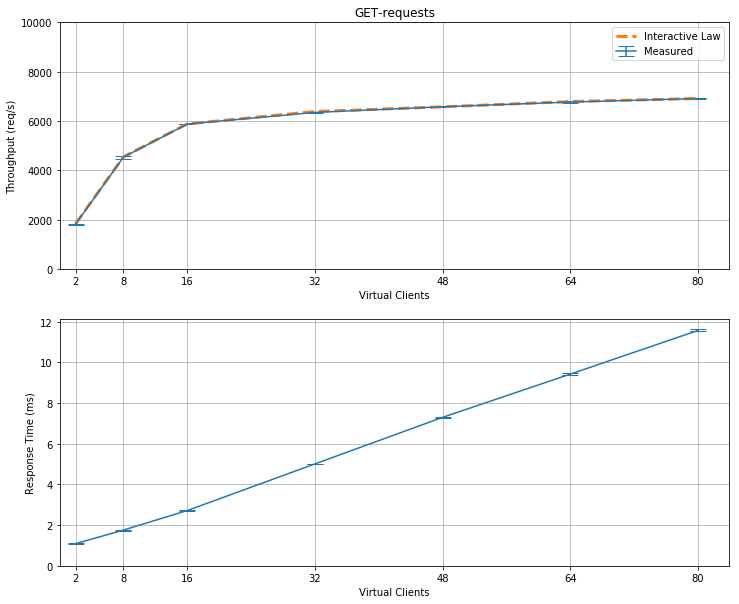

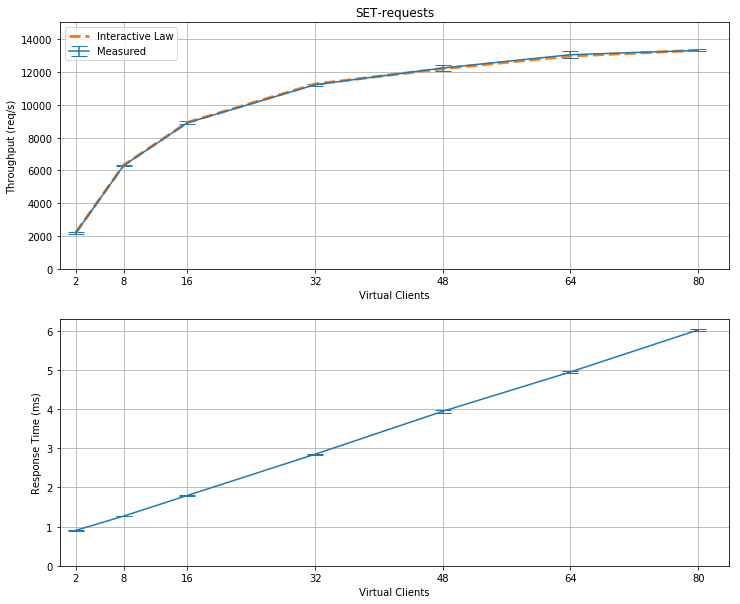

In [43]:
figure1 = plt.figure(1,figsize=(12, 10))
graph_get_tp = figure1.add_subplot(2,1,1)
graph_get_tp.errorbar(X_axis, gets_tp_mean, yerr=gets_tp_std, capsize=8)
graph_get_tp.plot(X_axis, gets_il_tp, '--', linewidth=3) 
plt.xlabel("Virtual Clients")
plt.ylabel("Throughput (req/s)")
plt.ylim(0,10000)
plt.xlim(0)
plt.grid(True)
plt.setp([plt.xticks(X_axis)])
plt.legend(["Interactive Law", "Measured"])

graph_get_rt = figure1.add_subplot(2,1,2)
graph_get_rt.errorbar(X_axis, gets_rt_mean, yerr=gets_rt_std, capsize=8)
plt.xlabel("Virtual Clients")
plt.ylabel("Response Time (ms)")
plt.ylim(0)
plt.xlim(0)
plt.grid(True)
plt.setp([plt.xticks(X_axis)])
graph_get_tp.set_title("GET-requests")
# plt.show()
figure1.savefig(figure_path+"22_get_requests.png")

import distutils.dir_util
p = figure_path + "22_get_requests/"
distutils.dir_util.mkpath(p)
f = open(p+"processed.log", "w+")
f.write("X_axis\r\n")
f.write(str(X_axis))
f.write("\r\ngets_tp_mean\r\n")
f.write(str(gets_tp_mean))
f.write("\r\ngets_tp_std\r\n")
f.write(str(gets_tp_std))
f.write("\r\ngets_tp_IL\r\n")
f.write(str(gets_il_tp))
f.write("\r\ngets_rt_mean\r\n")
f.write(str(gets_rt_mean))
f.write("\r\ngets_tp_std\r\n")
f.write(str(gets_rt_std))
f.close()



figure2 = plt.figure(2,figsize=(12, 10))
graph_set_tp = figure2.add_subplot(2,1,1)
graph_set_tp.errorbar(X_axis, sets_tp_mean, yerr=sets_tp_std, capsize=8)
graph_set_tp.plot(X_axis, sets_il_tp, '--',linewidth=3) 
plt.xlabel("Virtual Clients")
plt.ylabel("Throughput (req/s)")
plt.ylim(0,15000)
plt.xlim(0)
plt.grid(True)
plt.setp([plt.xticks(X_axis)])
plt.legend(["Interactive Law", "Measured"])

graph_set_rt = figure2.add_subplot(2,1,2)
graph_set_rt.errorbar(X_axis, sets_rt_mean, yerr=sets_rt_std, capsize=8)
plt.xlabel("Virtual Clients")
plt.ylabel("Response Time (ms)")
plt.ylim(0)
plt.xlim(0)
plt.grid(True)
plt.setp([plt.xticks(X_axis)])
graph_set_tp.set_title("SET-requests")
# plt.show()
figure2.savefig(figure_path+"22_set_requests.png")

# Write to file
import distutils.dir_util
p = figure_path + "22_set_requests/"
distutils.dir_util.mkpath(p)
f = open(p+"processed.log", "w+")
f.write("X_axis\r\n")
f.write(str(X_axis))
f.write("\r\nsets_tp_mean\r\n")
f.write(str(sets_tp_mean))
f.write("\r\nsets_tp_std\r\n")
f.write(str(sets_tp_std))
f.write("\r\nsets_tp_IL\r\n")
f.write(str(sets_il_tp))
f.write("\r\nsets_rt_mean\r\n")
f.write(str(sets_rt_mean))
f.write("\r\nsets_tp_std\r\n")
f.write(str(sets_rt_std))
f.close()